# Analyse final list of mutations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', module='seaborn')
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
samples = ['AQ5180','AQ5186','AQ5174','AX4954','AX4955','AX4956','AX4957','AX4962','AX4963','AX4964','AX4965','AX4966']
tissues = ['tumor1', 'tumor2', 'blood', 'kidney', 'liver', 'pancreas', 'heart','lung','medulla','spleen','brain','bma']
samples_dict = {samples[i]:tissues[i] for i in range(0,len(samples))}
suffixes_dict = {'tumor1':'_t1','tumor2':'_t2','blood':'_b','kidney':'_k','liver':'_l','pancreas':'_p','heart':'_h','lung':'_lu','medulla':'_me','spleen':'_s','brain':'_br','bma':'_bm'}

In [7]:
df = pd.read_csv('./output/08_final_list_muts.tsv.gz',sep='\t')
df

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,...,qval_k,qval_l,qval_p,qval_h,qval_lu,qval_me,qval_s,qval_br,qval_bm,denovo_germline
0,chr1,865445,G,C,False,snv,81.0,136.0,128.0,152.0,...,1.140146e-38,4.983417e-42,3.221510e-40,1.411108e-42,2.816809e-40,6.019900e-24,2.205815e-47,5.422803e-44,1.896295e-46,False
1,chr1,4101122,G,T,False,snv,81.0,117.0,134.0,124.0,...,1.080279e-33,6.229271e-43,8.247065e-38,2.266049e-30,2.682705e-37,9.863003e-20,2.205815e-47,4.548977e-37,2.485512e-41,False
2,chr1,4352976,G,A,False,snv,73.0,121.0,126.0,143.0,...,3.827991e-41,1.240120e-47,1.649413e-37,9.517816e-38,3.304770e-35,1.232875e-20,4.517508e-44,1.037111e-42,2.545165e-38,False
3,chr1,7591505,T,C,False,snv,75.0,121.0,129.0,122.0,...,6.857147e-35,8.360786e-35,1.288604e-39,4.082971e-32,3.151674e-41,5.171054e-14,1.515824e-36,2.776475e-41,1.213629e-44,False
4,chr1,7983849,G,T,False,snv,76.0,125.0,127.0,130.0,...,2.852789e-37,7.026617e-40,3.298826e-37,4.223600e-31,2.165814e-30,1.926368e-22,3.446585e-49,9.316304e-34,5.212497e-35,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,chr6,165412639,T,G,False,snv,113.0,126.0,132.0,139.0,...,4.253323e-42,2.612746e-36,1.623022e-34,4.867281e-39,1.290926e-37,2.351523e-26,3.641464e-21,1.863261e-33,9.942049e-41,False
2434,chr7,57050159,C,G,False,snv,115.0,133.0,155.0,108.0,...,5.086819e-26,3.826070e-26,2.337539e-27,1.436593e-27,9.028329e-28,7.349397e-12,3.215020e-39,5.309906e-27,3.716271e-36,False
2435,chr7,57107156,G,A,False,snv,127.0,127.0,162.0,159.0,...,8.607259e-38,1.869165e-26,7.896844e-25,1.642169e-22,1.174473e-28,4.957144e-09,1.700112e-28,1.904664e-21,6.376770e-33,False
2436,chr7,65173952,GGGTAACAGACCT,-,False,indel,120.0,103.0,121.0,131.0,...,2.436825e-28,9.333663e-18,1.562210e-16,4.621489e-16,2.144070e-20,1.258474e-14,7.546196e-26,7.171056e-14,2.596092e-35,False


## Density plots to establish clonality threshold

In [8]:
samples_dict

{'AQ5180': 'tumor1',
 'AQ5186': 'tumor2',
 'AQ5174': 'blood',
 'AX4954': 'kidney',
 'AX4955': 'liver',
 'AX4956': 'pancreas',
 'AX4957': 'heart',
 'AX4962': 'lung',
 'AX4963': 'medulla',
 'AX4964': 'spleen',
 'AX4965': 'brain',
 'AX4966': 'bma'}

In [9]:
suffixes_dict2 = {suffixes_dict[tissue]:tissue for tissue in suffixes_dict.keys()}
suffixes_dict2

{'_t1': 'tumor1',
 '_t2': 'tumor2',
 '_b': 'blood',
 '_k': 'kidney',
 '_l': 'liver',
 '_p': 'pancreas',
 '_h': 'heart',
 '_lu': 'lung',
 '_me': 'medulla',
 '_s': 'spleen',
 '_br': 'brain',
 '_bm': 'bma'}

In [10]:
def density_plot (data,y_var,title,xlim_min,xlim_max, bins=100):
    '''Create density plot for CCF
    input: tumor data, title and xlim max
    output: plot()'''
    
    data = data[(~data[y_var].isnull())]
    data = data[y_var]
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 2)
    ax = sns.distplot(data,rug=True,bins=bins)
    ax.set_title(title,size=20,pad=20)
    ax.set_xlim(xlim_min,xlim_max)

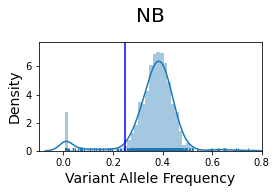

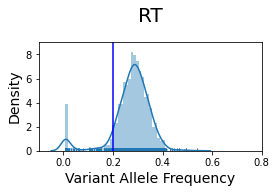

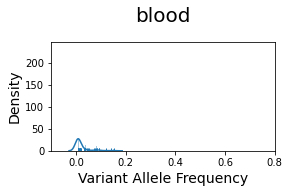

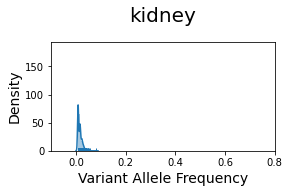

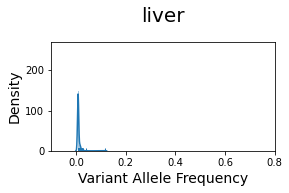

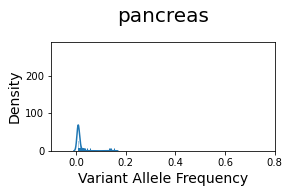

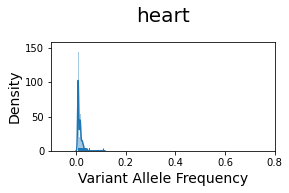

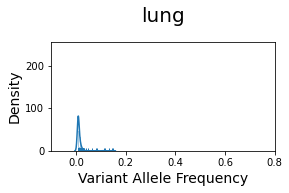

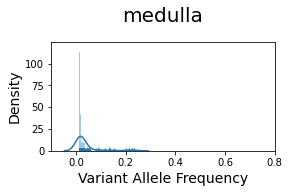

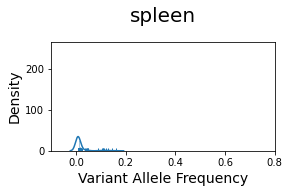

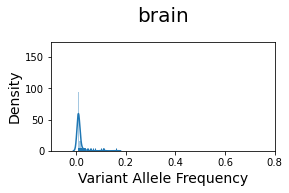

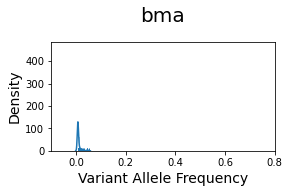

In [11]:
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    col = 'AF'+suffix
    data = df[(df[col]!=0)&(df['denovo_germline']==False)&(df['n_tissues']!=len(tissues))]
    y_var = col
    if tissue == 'tumor1':
        title = 'NB'
    elif tissue == 'tumor2':
        title = 'RT'
    else:
        title = tissue
    xlim = 1
    bins = 10
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=0.8,bins=50)
    plt.xlabel('Variant Allele Frequency',size=14)
    plt.ylabel('Density',size=14)
    if tissue == 'tumor1':
        plt.axvline(x = 0.25, color = 'b', label = 'clonal')
    elif tissue == 'tumor2':
        plt.axvline(x = 0.2, color = 'b', label = 'clonal')

    

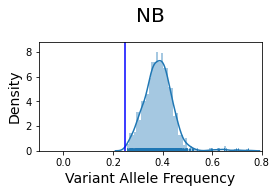

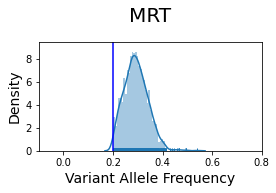

In [12]:
for tissue in ['tumor1','tumor2']:
    suffix = suffixes_dict[tissue]
    col = 'AF'+suffix
    if tissue == 'tumor1':
        title = 'NB'
        threshold = 0.25
    elif tissue == 'tumor2':
        title = 'RT'
        threshold = 0.2
    else:
        title = tissue
    data = df[(df[col]>threshold)&(df['denovo_germline']==False)&(df['n_tissues']!=len(tissues))]
    y_var = col
    if tissue == 'tumor1':
        title = 'NB'
    elif tissue == 'tumor2':
        title = 'MRT'
    else:
        title = tissue
    xlim = 1
    bins = 10
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=0.8,bins=50)
    plt.xlabel('Variant Allele Frequency',size=14)
    plt.ylabel('Density',size=14)

    plt.axvline(x = threshold, color = 'b', label = 'clonal')
    
    plt.savefig('./figures_paper/'+title+'_VAF_clonal_selection.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

    plt.show()

## Density plot with sequencing depth from chrom1 blood sample

In [29]:
import gzip
import numpy as np
from scipy.stats import t

In [30]:
input_file = './depth/AQ5174/chr1_depth.txt.gz'

counts = []
with gzip.open(input_file,'r') as file:
    for line in tqdm(file):
        line = str(line)
        count = line.split('\\t')[2].split('\\n')[0]
        if int(count) < 400:
            counts.append(int(count))
    file.close()

In [31]:
mean = np.mean (counts)
sd = np.std (counts)

dof = len(counts)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
left_ci_95 = mean-sd*t_crit/np.sqrt(len(count))
right_ci_95 = mean+sd*t_crit/np.sqrt(len(count))

In [32]:
#exclude positions with very high depth (>300 reads)
counts2 =[count for count in tqdm(counts) if count<300 ]

In [33]:
print(len(counts))
print(len(counts2))

229247627
228930910


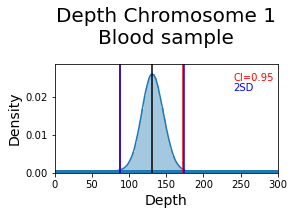

In [35]:
bins = 100
title = 'Depth Chromosome 1\nBlood sample'
xlim_min = 0
xlim_max = 300
data = counts2[10000000:15000000]
fig, ax = plt.subplots()
fig.set_size_inches(4, 2)
ax = sns.distplot(data,rug=True,bins=bins)
ax.set_title(title,size=20,pad=20)
ax.set_xlim(xlim_min,xlim_max)
plt.xlabel('Depth',size=14)
plt.ylabel('Density',size=14)

plt.axvline(mean,color='black')

plt.axvline(left_ci_95,color='red')
plt.axvline(right_ci_95,color='red')
plt.text(x=.8,y=0.85,s='CI=0.95',transform = ax.transAxes,color='red')

plt.axvline(mean-2*sd,color='blue')
plt.axvline(mean+2*sd,color='blue')
plt.text(x=.8,y=0.75,s='2SD',transform = ax.transAxes,color='blue')

plt.savefig('./figures_paper/depth_chr1_blood_sample.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Calculate Clonal Fraction (CF)

In [14]:
#get tumors purity from purple output

path_to_platinum = '/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t1-allsamples-t1/'
# path_to_platinum = '/path/to/platinum/' #fix at the end
sample_id = 'AQ5180'
cnv_df1 = pd.read_csv(path_to_platinum+'purple/'+sample_id+'.purple.cnv.somatic.tsv',sep='\t')
cnv_df1[['chromosome','start','end','copyNumber']]
cnv_df1['SAMPLE'] = 'tumor1'

purity1 = pd.read_csv(path_to_platinum+'purple/'+sample_id+'.purple.purity.tsv',sep='\t')
purity1 = purity1.iloc[0,0]
purity_dict = {}
purity_dict['tumor1'] = purity1


path_to_platinum ='/workspace/datasets/sjd_seq/platinum_results/20220809/pt1-t2-allsamples-t2/'
# path_to_platinum = '/path/to/platinum/' #fix  the end
sample_id = 'AQ5186'
cnv_df2 = pd.read_csv(path_to_platinum+'purple/'+sample_id+'.purple.cnv.somatic.tsv',sep='\t')
cnv_df2[['chromosome','start','end','copyNumber']]
cnv_df2['SAMPLE'] = 'tumor2'
cnv_df = pd.concat([cnv_df1,cnv_df2],ignore_index=True)

purity2 = pd.read_csv(path_to_platinum+'purple/'+sample_id+'.purple.purity.tsv',sep='\t')
purity2 = purity2.iloc[0,0]
purity_dict['tumor2'] = purity2
purity_dict

{'tumor1': 0.79, 'tumor2': 0.58}

In [15]:
def calculate_ccf (row,tissue,suffix):
    if row['AF'+suffix] == 0:
        ccf = 0
    else:
        chrom_mut = row['CHROM']
        pos_mut = int(row['POS'])
        vaf = row['AF'+suffix]
        purity = purity_dict[tissue]
        cnv_df1 = cnv_df[(cnv_df['SAMPLE']==tissue)&(cnv_df['chromosome']==chrom_mut)] 
        for row2 in cnv_df1.iterrows():
            pos1_cnv = int(row2[1][1])
            pos2_cnv = int(row2[1][2])
            cnv = row2[1][3]
            if pos1_cnv < pos_mut and pos2_cnv > pos_mut:
                ccf = vaf*(purity*cnv+ (1-purity)*2)/purity
            else:
                ccf = vaf*(purity* 2 + (1-purity)*2)/purity
    return ccf

for tissue in tissues:
    suffix = suffixes_dict[tissue]
    if tissue == 'tumor1' or tissue == 'tumor2':
        df['CF'+suffix] = df.apply(lambda row: calculate_ccf (row,tissue,suffix),axis=1)
    else:
        df['CF'+suffix] = df['AF'+suffix].apply(lambda x: x*2)
df

,CHROM,POS,REF,ALT,parents,mut_type,depth_t1,depth_t2,depth_b,depth_k,...,CF_b,CF_k,CF_l,CF_p,CF_h,CF_lu,CF_me,CF_s,CF_br,CF_bm
0,chr1,865445,G,C,False,snv,81.0,136.0,128.0,152.0,...,0.0000,0.0526,0.0000,0.0000,0.0132,0.0140,0.0000,0.0000,0.0000,0.0000
1,chr1,4101122,G,T,False,snv,81.0,117.0,134.0,124.0,...,0.0000,0.0322,0.0000,0.0000,0.0182,0.0152,0.0000,0.0000,0.0000,0.0000
2,chr1,4352976,G,A,False,snv,73.0,121.0,126.0,143.0,...,0.0000,0.0140,0.0120,0.0000,0.0284,0.0000,0.0000,0.0000,0.0132,0.0000
3,chr1,7591505,T,C,False,snv,75.0,121.0,129.0,122.0,...,0.0000,0.0164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,chr1,7983849,G,T,False,snv,76.0,125.0,127.0,130.0,...,0.0000,0.0154,0.0142,0.0000,0.0746,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,chr6,165412639,T,G,False,snv,113.0,126.0,132.0,139.0,...,0.0000,0.0000,0.0000,0.0164,0.0000,0.0000,0.0000,0.2206,0.0000,0.0000
2434,chr7,57050159,C,G,False,snv,115.0,133.0,155.0,108.0,...,0.0774,0.0740,0.1008,0.0702,0.1186,0.1076,0.2134,0.0144,0.0380,0.0666
2435,chr7,57107156,G,A,False,snv,127.0,127.0,162.0,159.0,...,0.3210,0.0754,0.1354,0.1630,0.1912,0.1370,0.2686,0.1568,0.1284,0.1146
2436,chr7,65173952,GGGTAACAGACCT,-,False,indel,120.0,103.0,121.0,131.0,...,0.1770,0.1076,0.2260,0.2136,0.2456,0.2336,0.1708,0.1374,0.2752,0.0564


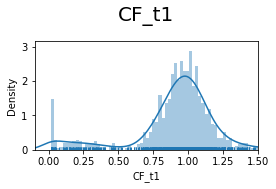

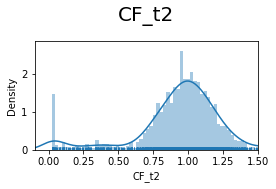

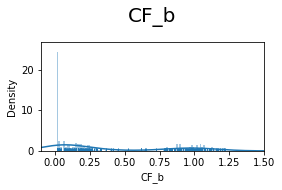

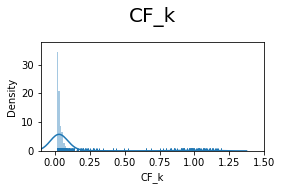

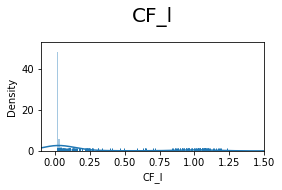

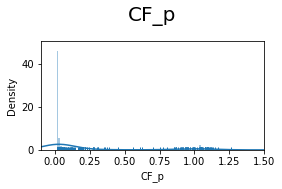

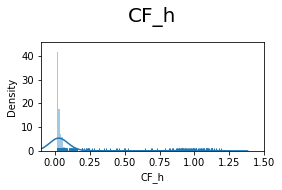

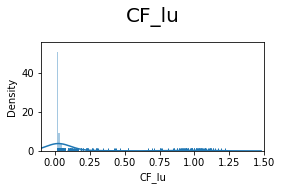

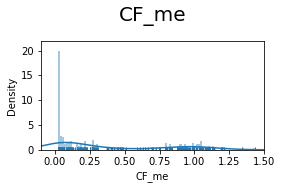

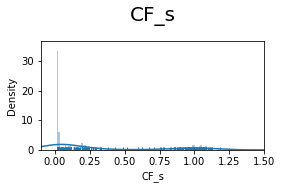

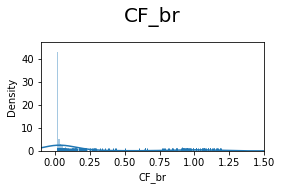

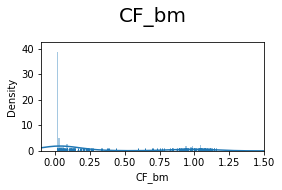

In [16]:
#check Clonal Fraction distribution
for tissue in tissues:
    suffix = suffixes_dict[tissue]
    col = 'CF'+suffix
    data = df[(df[col]!=0)&(df['n_tissues']!=7)]
    y_var = col
    title = col
    xlim = 1.5
    bins = 100
    density_plot(data=data,y_var=y_var,title=title,xlim_min=-0.1,xlim_max=xlim,bins=bins)

 ## Clustermap / heatmap

In [17]:
suffixes = [ suffixes_dict[tissue] for tissue in tissues]
cf_cols = ['CF'+suffix for suffix in suffixes]
suffixes3_dict = {suffix[1]:suffix[0] for suffix in suffixes_dict.items()}
label_cols_dict = {col:suffixes3_dict[col.split('CF')[1]] for col in cf_cols}
label_cols_dict['CF_t1'] = 'NB'
label_cols_dict['CF_t2'] = 'RT'
label_cols = [label_cols_dict[af] for af in label_cols_dict.keys()]


Important notes:
- Removed alterations clonal in 1 tumor and subclonal in the other (likely artifacts)
- Mutations are grouped by `['CHROM','POS','REF','ALT']`

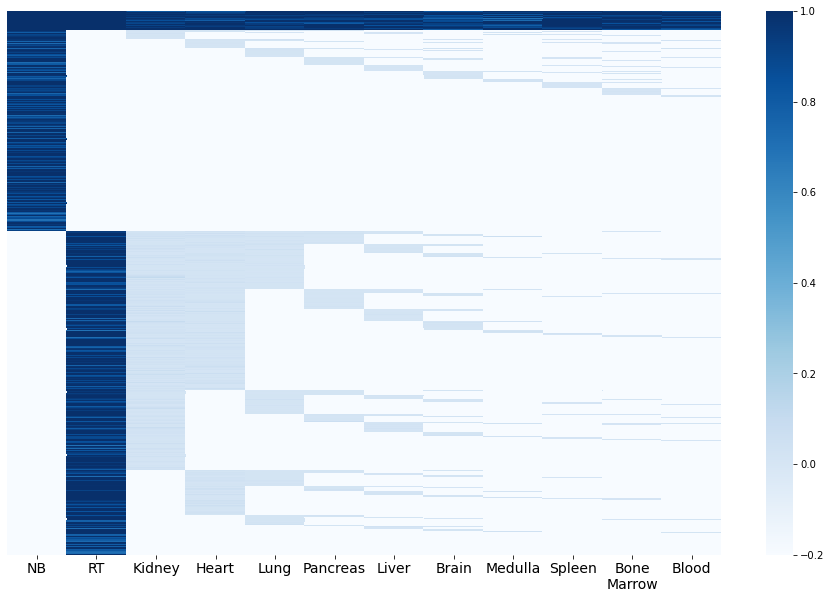

In [18]:
order_cols = ['CF_t1','CF_t2','CF_k','CF_h','CF_lu','CF_p','CF_l','CF_br','CF_me','CF_s','CF_bm','CF_b']
order_cols2 = ['denovo_germline','tumor1','tumor2','kidney','heart','lung','pancreas','liver','brain','medulla','spleen','bma','blood']
x_labels = ['NB','RT','Kidney','Heart','Lung','Pancreas','Liver','Brain','Medulla','Spleen','Bone\nMarrow','Blood']
data = df[((df['AF_t1']>=0.25)&(df['AF_t2']==0))|((df['AF_t2']>=0.2)&(df['AF_t1']==0))|((df['AF_t1']>=0.25)&(df['AF_t2']>=0.2))].sort_values(by=order_cols2,ascending=False)
data = data.drop_duplicates(subset=['CHROM','POS','REF','ALT'])
data = data.set_index(['SYMBOL','Consequence'])
data.index_name = ''
data[order_cols] = data[order_cols].replace(0,-0.2)
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(data[order_cols],xticklabels=x_labels,cmap='Blues',vmin=-0.2,vmax=1,yticklabels='')
plt.xticks(fontsize=14,rotation=0)
plt.ylabel('')
plt.savefig('./figures_paper/heatmap_blue_nb_rt_plot.png',dpi=300, format='png')
plt.show()

In [65]:
print('Total muts')
print(len(data[data['denovo_germline']==True]),'denovo germline')
print(len(data[(data['denovo_germline']==False)&(data['n_tissues']==12)]),'somatic shared with all tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)]),'somatic NB ')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']==11)]),'somatic NB shared with 11 tissues, not in MRT')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']<11)]),'somatic NB shared with less than 11 tissues, not in MRT')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t1']!=0)&(data['AF_t2']==0)&(data['n_tissues']==1)]),'somatic unique NB')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)]),'somatic MRT')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']==9)]),'somatic MRT shared with 9 tissues, not in NB')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']<9)]),'somatic MRT, shared with less than 9 tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(data[(data['denovo_germline']==False)&(data['AF_t2']!=0)&(data['AF_t1']==0)&(data['n_tissues']==1)]),'somatic unique MRT')

Total muts
79 denovo germline
1 somatic shared with all tissues
805 somatic NB 
0 somatic NB shared with 11 tissues, not in MRT
805 somatic NB shared with less than 11 tissues, not in MRT
269 somatic NB shared with some tissues
536 somatic unique NB
1298 somatic MRT
0 somatic MRT shared with 9 tissues, not in NB
1298 somatic MRT, shared with less than 9 tissues
1213 somatic MRT shared with some tissues
85 somatic unique MRT


In [58]:
snv_data = data[data['mut_type']=='snv']

In [85]:
print('SNVs')
print(len(snv_data[snv_data['denovo_germline']==True]),'denovo germline')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['n_tissues']==12)]),'somatic shared with all tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)]),'somatic NB ')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']==5)]),'somatic NB shared with 4 tissues, not in MRT')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']<5)]),'somatic NB shared with less than 4 tissues, not in MRT')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t1']!=0)&(snv_data['AF_t2']==0)&(snv_data['n_tissues']==1)]),'somatic unique NB')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)]),'somatic MRT')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']==8)]),'somatic MRT shared with 7 tissues, not in NB')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']<8)]),'somatic MRT, shared with less than 7 tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(snv_data[(snv_data['denovo_germline']==False)&(snv_data['AF_t2']!=0)&(snv_data['AF_t1']==0)&(snv_data['n_tissues']==1)]),'somatic unique MRT')

SNVs
78 denovo germline
1 somatic shared with all tissues
768 somatic NB 
6 somatic NB shared with 4 tissues, not in MRT
762 somatic NB shared with less than 4 tissues, not in MRT
258 somatic NB shared with some tissues
510 somatic unique NB
1149 somatic MRT
1 somatic MRT shared with 7 tissues, not in NB
1148 somatic MRT, shared with less than 7 tissues
1071 somatic MRT shared with some tissues
78 somatic unique MRT


In [88]:
#check number of somatic mutations in NB
768
258+510

768

In [89]:
#check number of somatic mutations in MRT
1149
1071+78

1149

In [54]:
indel_data = data[data['mut_type']=='indel']

In [63]:
print('Indels')
print(len(indel_data[indel_data['denovo_germline']==True]),'denovo germline')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['n_tissues']==12)]),'somatic shared with all tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)]),'somatic NB ')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']==11)]),'somatic NB shared with 11 tissues, not in MRT')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']<11)]),'somatic NB shared with less than 11 tissues, not in MRT')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']>1)]),'somatic NB shared with some tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t1']!=0)&(indel_data['AF_t2']==0)&(indel_data['n_tissues']==1)]),'somatic unique NB')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)]),'somatic MRT')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']==9)]),'somatic MRT shared with 9 tissues, not in NB')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']<9)]),'somatic MRT, shared with less than 9 tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']>1)]),'somatic MRT shared with some tissues')
print(len(indel_data[(indel_data['denovo_germline']==False)&(indel_data['AF_t2']!=0)&(indel_data['AF_t1']==0)&(indel_data['n_tissues']==1)]),'somatic unique MRT')

Indels
1 denovo germline
0 somatic shared with all tissues
37 somatic NB 
0 somatic NB shared with 11 tissues, not in MRT
37 somatic NB shared with less than 11 tissues, not in MRT
11 somatic NB shared with some tissues
26 somatic unique NB
149 somatic MRT
0 somatic MRT shared with 9 tissues, not in NB
149 somatic MRT, shared with less than 9 tissues
142 somatic MRT shared with some tissues
7 somatic unique MRT
